In [1]:
# 모듈 로딩
import pandas as pd
import platform
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np

# DF객체 생성
weatherDF = pd.read_csv('daegu_utf-8.csv')
weatherDF.head(5)

# '날짜'열 datetime 형식으로 변환
weatherDF['날짜'] = pd.to_datetime(weatherDF['날짜'])

시작 연도를 입력하세요 : 2010
마지막 연도를 입력하세요 : 2021
기온 변화를 측정할 달을 입력하세요 : 12
12월 최고기온 평균:
[7.3 6.9 3.9 8.1 5.8 9.  8.7 5.8 7.  9.  7.2 8.9]
12월 최저기온 평균:
[-2.5 -1.5 -3.9 -0.5 -2.8  0.5 -0.6 -4.  -2.3 -1.  -3.1 -2.1]


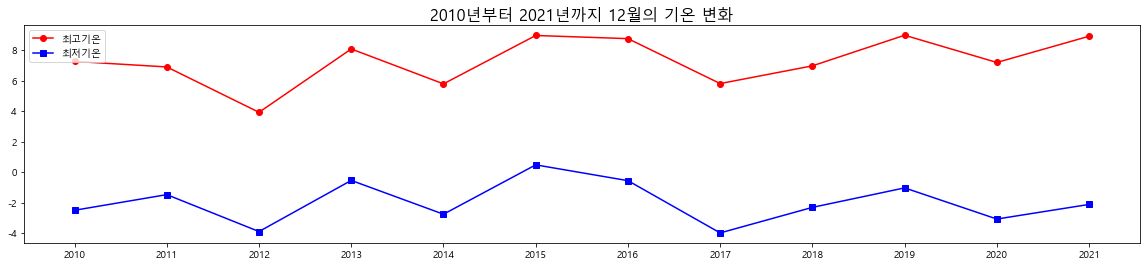

In [3]:
def draw_graph_on_date():
    while True:    # 시작연도 입력받기
        try:
            start_year = int(input('시작 연도를 입력하세요 : '))
            if (start_year < 1907) or (start_year > 2023) :
                print('잘못된 연도입니다.')
            else:
                break
        except: 
            print('잘못된 연도입니다.')
            
    while True:    # 마지막연도 입력받기
        try:
            end_year = int(input('마지막 연도를 입력하세요 : '))
            if (end_year < 1907) or (end_year > 2023) or (end_year < start_year) :
                print('잘못된 연도입니다.')
            else:
                break
        except: 
            print('잘못된 연도입니다.')  
        
    while True:    # 월 입력받기
        try:
            month = int(input('기온 변화를 측정할 달을 입력하세요 : '))
            if (month < 1) or (month > 12) :
                print('잘못된 월입니다.')
            else:
                break
        except: 
            print('잘못된 월입니다.')
    
    # 연도 및 월 필터링
    filterDF = weatherDF[(weatherDF['날짜'].dt.year >= start_year) & (weatherDF['날짜'].dt.year <= end_year) & (weatherDF['날짜'].dt.month == month)]
    
    max_temp = []
    min_temp = []
    for i in range(start_year, end_year + 1):    # 월별 최고, 최저 평균기온 리스트로 저장
        filterDF_2 = filterDF[filterDF['날짜'].dt.year == i]
        max_temp.append(filterDF_2['최고기온'].mean())
        min_temp.append(filterDF_2['최저기온'].mean())
    
    # print문 출력
    print(f'{month}월 최고기온 평균:\n{np.round(max_temp,1)}')
    print(f'{month}월 최저기온 평균:\n{np.round(min_temp,1)}')
    
    # x축으로 사용할 year 리스트 생성
    year_list = pd.date_range(start=str(start_year), end=str(end_year+1), freq='Y').strftime('%Y').to_list()
    year_list
    
    # 그래프 시각화
    plt.figure(figsize=(20, 4))
    plt.plot(year_list, max_temp, 'ro-', label='최고기온')
    plt.plot(year_list, min_temp, 'bs-', label='최저기온')
    if platform.system() == 'Windows':    # 윈도우
        font_name = fm.FontProperties(fname='c:\Windows\Fonts\malgun.ttf').get_name()
        plt.rc('font', family=font_name)
    else:    # 그 외
        plt.rc('font', family='AppleGothic', size=8)
    plt.rcParams['axes.unicode_minus'] = False
    plt.title(f"{start_year}년부터 {end_year}년까지 {month}월의 기온 변화", size=16)
    plt.legend(loc=2)
    plt.show()
    
    
draw_graph_on_date()